## Data cleaning, EDA and feature engineering

##### Importing libraries and reading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_sales = pd.read_csv('car_prices.csv')

In [3]:
car_sales.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [58]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   558837 non-null  int64  
 1   make                   558837 non-null  object 
 2   model                  558837 non-null  object 
 3   trim                   548186 non-null  object 
 4   body                   558837 non-null  object 
 5   transmission           493485 non-null  object 
 6   vin                    558833 non-null  object 
 7   state                  558811 non-null  object 
 8   condition              547017 non-null  float64
 9   odometer               558743 non-null  float64
 10  color                  558088 non-null  object 
 11  interior               558088 non-null  object 
 12  seller                 558837 non-null  object 
 13  mmr                    558799 non-null  float64
 14  sellingprice           558825 non-nu

##### Price vs MMR rate (%)

In [3]:
car_sales['price vs MMR rate (%)'] = (car_sales['sellingprice']/car_sales['mmr']) * 100  
# Shows how sales performed against market values (mmr metric in this case) 
# If the rate > 100%, the car sold above MMR value

##### To not only count in miles but also in kilometers

In [4]:
car_sales['odometer (km)'] = car_sales['odometer'].apply(lambda x: round(x * 1.609, 0))

##### Handling wrong formats

In [5]:
car_sales['state'] = car_sales['state'].apply(lambda x: x.upper())
car_sales['state'] = car_sales['state'].apply(lambda x: None if len(x)>2 else x)

In [6]:
car_sales['make'] = car_sales['make'].apply(lambda x: str(x).title())
car_sales['body'] = car_sales['body'].apply(lambda x: str(x).title())
car_sales['model'] = car_sales['model'].apply(lambda x: str(x).title())

In [7]:
unification_dict = {
    r'(?i)ford\s*(truck|tk|-truck|-tk)': 'Ford',
    r'(?i)chev(y|rolet)?\s*(truck|tk|-truck|-tk)': 'Chevrolet',
    r'(?i)hyundai\s*(truck|tk|-truck|-tk)': 'Hyundai',
    r'(?i)dodge\s*(truck|tk|-truck|-tk)': 'Dodge',
    r'(?i)mazda\s*(truck|tk|-truck|-tk)': 'Mazda',
    r'(?i)gmc\s*(truck|tk|-truck|-tk)': 'Gmc',
    r'(?i)mercedes(\s*.+)?':'Mercedes-Benz',
    'Landrover' : 'Land Rover',
    'Vw' : 'Volkswagen'
    
}

car_sales['make'] = car_sales['make'].replace(unification_dict, regex=True)

##### Searching for null values

<Axes: >

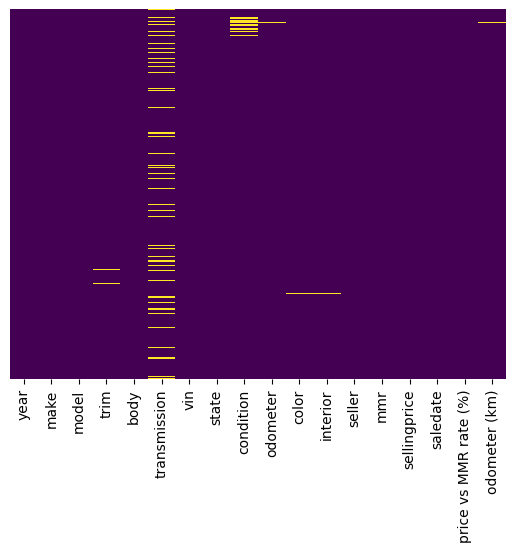

In [8]:
car_sales.drop_duplicates()
sns.heatmap(car_sales.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There's a few missing values in different features. However, we wont drop any more records yet

### Sales Analysis and trends

#### Sales throughtout time

In [536]:
# Saledate formatting: to_datetime convertion and grabbing the month 
car_sales['saledate'] = car_sales['saledate'].str.slice(0,-6)
car_sales['saledate'] = pd.to_datetime(car_sales['saledate'], utc=True)
car_sales['month'] = car_sales['saledate'].apply(lambda x: x.month)

In [ ]:
#To see the period on which the sales took place and count them
sales_by = car_sales[car_sales['saledate'].apply(lambda x: x.year)==2015].groupby('month').count() 

In [ ]:
#you'll see that theres no sales after august 2015, lets fill that gap with synthetic data generated from the original df
fig=sns.lineplot(sales_by, x='month', y='saledate')
fig.set(xlim=[1,12], xticks=[1,2,3,4,5,6,7,8,9,10,11,12] )

#### Fill in the sales gap (optional): would alter the dataset authenticity

In [201]:
#VAMOS A AGREGAR DATOS PARA LOS MESES QUE FALTAN
from datetime import datetime, timedelta
import random

# Configurar semilla para reproducibilidad
np.random.seed(42)

# Definir marcas y modelos comunes
base_prices = { 'Toyota': car_sales[(car_sales['make']=='Toyota') & (2012<=car_sales['year'])]['sellingprice'].mean(),
    'Honda': car_sales[(car_sales['make']=='Honda') & (2012<=car_sales['year'])]['sellingprice'].mean(),
    'Ford': car_sales[(car_sales['make']=='Chevrolet') & (2012<=car_sales['year'])]['sellingprice'].mean(),
    'Chevrolet': car_sales[car_sales['make']=='Chevrolet']['sellingprice'].mean(),
    'Nissan': car_sales[(car_sales['make']=='Nissan') & (2012<=car_sales['year'])]['sellingprice'].mean(),
    'Tesla': car_sales[(car_sales['make']=='Tesla') & (2012<=car_sales['year'])]['sellingprice'].mean(),
    'Dogde':car_sales[(car_sales['make']=='Tesla') & (2012<=car_sales['year'])]['sellingprice'].mean(),
    'BMW':car_sales[(car_sales['make']=='BMW') & (2012<=car_sales['year'])]['sellingprice'].mean(),
    'Jeep':car_sales[(car_sales['make']=='Jeep') & (2012<=car_sales['year'])]['sellingprice'].mean(),
    'Hyundai':car_sales[(car_sales['make']=='Hyundai') & (2012<=car_sales['year'])]['sellingprice'].mean(),
    'Chrysler':car_sales[(car_sales['make']=='Chrysler') & (2012<=car_sales['year'])]['sellingprice'].mean(),
    'Mitsubishi':car_sales[(car_sales['make']=='Mitsubishi') & (2012<=car_sales['year'])]['sellingprice'].mean(),
    'Volvo':car_sales[(car_sales['make']=='Volvo') & (2012<=car_sales['year'])]['sellingprice'].mean()  

}
brands = list(base_prices.keys())
models = {
    'Toyota': ['Corolla', 'Camry', 'RAV4'],
    'Honda': ['Civic', 'Accord', 'CR-V'],
    'Ford': ['Mustang', 'F-150', 'Explorer'],
    'Chevrolet': ['Camaro', 'Spark', 'Equinox'],
    'Nissan': ['Sentra', 'Altima', 'Versa'],
    'Tesla': ['Model S', 'Model X'],
    'Dogde':['Challenger','Charger','Journey'],
    'BMW':['3 Series', 'X1', 'X3'],
    'Jeep':['Grand Cherokee', 'Compass', 'Wrangler'],
    'Hyundai':['Tucson', 'Santa Fe', 'Elantra'],
    'Chrysler':['300C'],
    'Mitsubishi':['Outlander', 'Lancer'],
    'Volvo':['XC60', '240']   
}
years=[2012, 2013, 2014, 2015]

states=[
    "AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "IA",
    "ID", "IL", "IN", "KS", "KY", "LA", "MA", "MD", "ME", "MI", "MN", "MO",
    "MS", "MT", "NC", "ND", "NE", "NH", "NJ", "NM", "NV", "NY", "OH", "OK",
    "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI",
    "WV", "WY", "DC"
]

colors = ['white', 'black', 'gray', 'silver']
sellers = ['AutoNation','the hertz corporation', 'santander consumer', 'avis corporation', 'wells fargo dealer services', 'tdaf remarketing']

# Función para generar VIN aleatorio (sin Faker)
def generate_vin():
    letters = 'abcdefghijklmnopqrstuvwxyz0123456789'
    return ''.join(random.choices(letters, k=17)).lower()  # VIN en minúsculas

# Función para generar fechas aleatorias entre agosto y diciembre de 2015
def random_date(start_date, end_date):
    delta = end_date - start_date
    random_days = random.randint(0, delta.days)
    return start_date + timedelta(days=random_days)

start_date = datetime(2015, 8, 1)
end_date = datetime(2015, 12, 31)


#Generar registros

fresh_sales = []
for _ in range(20000):  #  cantidad de registros nuevos (ajusta según necesidad)
    year= np.random.choice(years)
    make = np.random.choice(brands)
    model = np.random.choice(models[make])
    trim=0
    body=0
    transmission='automatic'
    vin = generate_vin()  # Formato VIN aleatorio
    state = np.random.choice(states)
    condition = np.random.randint(1, 50)
    odometer = np.random.randint(1, 60000)
    color = np.random.choice(colors)
    interior=0
    seller = np.random.choice(sellers)
    
    base_price = base_prices[make]
    mmr = base_price * (1 + np.random.uniform(-0.15, 0.15))  # MMR entre -15% y +15% del base
    
    #Ajuste por kilometraje (penalización) y condición (bonificación)
    odometer_penalty = (odometer / 62000) * 0.6  # Máx 60% de penalización si odometer = 100,000 km o 62000 Miles
    condition_boost = (condition / 50) * 0.4       # Máx 40% de bonificación si condition = 49
    adjusted_mmr = round(mmr * (1 - odometer_penalty) * (1 + condition_boost), 0)
    
    # Agregar margen del vendedor (8%-20%)
    sellingprice = adjusted_mmr * (1 + np.random.uniform(0.08, 0.20))
    sellingprice = round(max(10000, min(100000, sellingprice)), 0) # Limitar a rango realista
    
    
    saledate = pd.to_datetime(random_date(start_date, end_date).strftime('%Y-%m-%d'))  # Formato YYYY-MM-DD

    odometer_km =  round(odometer * 1.609, 0)
    month = saledate.month

    fresh_sales.append({'year': year,
                        'make': make,
                        'model': model,
                        'trim': " ",
                        'body' : " ",
                        'transmission' : transmission,
                        'vin' : vin,
                        'state' : state,
                        'condition' : condition,
                        'odometer' : odometer,
                        'color' : color,
                        'interior' : " ",
                        'seller' : seller,
                        'mmr' : adjusted_mmr,
                        'sellingprice' : sellingprice,
                        'saledate' : saledate,
                        'odometer (km)' : odometer_km,
                        'month' : month
                        
                          
    })

fresh_df = pd.DataFrame(fresh_sales)
    

In [187]:
fresh_df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,odometer (km),month
0,2014,Chevrolet,Camaro,,,automatic,tfwk1kjp2k0td2xdc,IN,43,54344,white,,wells fargo dealer services,6844.0,10000.0,2015-12-20,87439.0,12
1,2014,Chrysler,300C,,,automatic,ug760qvb83x4zwak7,MO,36,16024,gray,,tdaf remarketing,15099.0,17615.0,2015-12-03,25783.0,12


In [202]:
total_car_sales = pd.concat([car_sales, fresh_df])

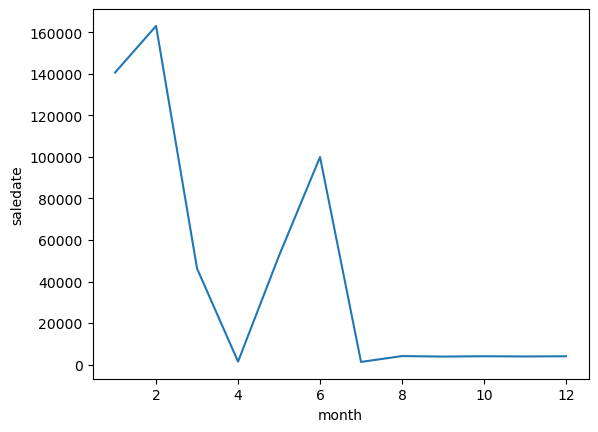

In [203]:
sales_by_month = total_car_sales[total_car_sales['saledate'].apply(lambda x: x.year)==2015].groupby('month').count() 
fig=sns.lineplot(sales_by_month, x='month', y='saledate')

#### Which models, brands or categories have the highest/lowest turnover?

In [112]:
car_sales['make'].value_counts().head(5)  #Top 5 brands in sales
#sum(car_sales['make'].value_counts().head(5)/len(car_sales) * 100) ---- dominate 51% of the sales registered

make
Ford         93997
Chevrolet    60587
Nissan       54017
Toyota       39966
Dodge        30955
Name: count, dtype: int64

In [645]:
car_sales['model'].value_counts().head(5) #Top 5 models in sales
#sum(car_sales['model'].value_counts().head(5)/len(car_sales) * 100)  ---- represent 13% of the sales registered

model
Altima    19173
F-150     14183
Fusion    12876
Camry     12333
Escape    11761
Name: count, dtype: int64

In [646]:
car_sales['body'].value_counts().head(5) #Top 5 categories in sales
#sum(car_sales['body'].value_counts().head(5)/len(car_sales) * 100)  ---- dominate 83% of the sales registered

82.98292982426719

In [238]:
car_sales[['make','model']].value_counts().head(5) 

make    model 
Nissan  Altima    19349
Ford    F-150     14479
        Fusion    12946
Toyota  Camry     12549
Ford    Escape    11893
Name: count, dtype: int64

#### How do sales compare by regions/dealership?

##### By region

In [648]:
car_sales['state'].value_counts().head(40) #Top 10 states in sales

state
FL    79982
CA    70191
PA    52528
TX    43970
GA    33698
NJ    26960
IL    21993
OH    21078
NC    21068
TN    20678
MO    15645
MI    15045
NV    12088
VA    11300
MD    10676
WI     9512
MN     8866
AZ     8005
CO     7589
WA     7169
MA     6449
NY     4857
IN     4196
SC     3991
NE     3706
ON     2817
PR     2653
LA     1849
MS     1814
UT     1745
HI     1218
OR     1133
QC     1107
AB      799
NM      164
OK       57
NS       46
AL       25
Name: count, dtype: int64

##### By dealership

In [60]:
import re
from collections import defaultdict

def clean_n_standardize_sellername(df, column='seller'):
    """
    Cleans undesired characters from the strings on the seller column and standardize them.

    Steps:
        1. Drops symbols, numbers and redundant spacing.
        2. Filters common words (LLC, Inc, etc.).
        3. Groups by words shared between sellers.
    """
    # Commomn words to ignore (exact comparison)
    common_words = {
        'llc', 'inc', 'corp', 'group', 'company', 'co', 'motor', 'motors',
        'financial', 'services', 'sales', 'dealer', 'dealership', 'credit', 
        'auto', 'the', 'of', 'america', 'north', 'international', 'pd', 'eot',
        'finance', 'budget', 'gdp', 'corporation', 'acceptance'
    }
    
    # To clean undesired characters from the seller strings
    def clean_string(text):
        if pd.isna(text):
            return None
        # Clear numbers, symbols and special characters
        cleaned_text = re.sub(r'[^a-zA-Z]', ' ', str(text))
        # Eliminar espacios extras y convertir a minúsculas
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip().lower()
        return cleaned_text if cleaned_text else None
    
    # Step 1: Cleaning the column on the df
    df['clean_name'] = df[column].apply(clean_string)
    
    # Step 2: Drop common words before the comparison
    def filter_common_words(text):
        if text is None:
            return None
        words = [w for w in text.split() if w not in common_words]
        return ' '.join(words) if words else None
    
    df['name_to_compare_with'] = df['clean_name'].apply(filter_common_words)
    
    # Step 3: Group by exact coincidence on the filtered name 
    groups = defaultdict(list)
    for idx, name in enumerate(df['name_to_compare_with']):
        if name is not None:
            groups[name].append(idx)
    
    # Step 4: Asign the first original name from the group (already cleaned) 
    mapping = {}
    for filtered_name, indices in groups.items():
        first_cleaned_name = df['clean_name'].iloc[indices[0]]  # User the clean version
        for idx in indices:
            mapping[idx] = first_cleaned_name.title()  
    
    # Step 5: Mapping and then dropping the temporal columns
    df['seller'] = [mapping.get(i, df['clean_name'].iloc[i]) for i in range(len(df))]
    df.drop(['clean_name', 'name_to_compare_with'], axis=1, inplace=True)
    
    return df


In [61]:
clean_n_standardize_sellername(car_sales,'seller')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,price vs MMR rate (%),odometer (km)
0,2015,Kia,Sorento,LX,Suv,automatic,5xyktca69fg566472,CA,5.0,16639.0,white,black,Kia Motors America Inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),104.878049,26772.0
1,2015,Kia,Sorento,LX,Suv,automatic,5xyktca69fg561319,CA,5.0,9393.0,white,beige,Kia Motors America Inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),103.365385,15113.0
2,2014,Bmw,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,CA,45.0,1331.0,gray,black,Financial Services Remarketing Lease,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),94.043887,2142.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,CA,41.0,14282.0,white,black,Volvo Na Rep World Omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),100.909091,22980.0
4,2014,Bmw,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,CA,43.0,2641.0,gray,black,Financial Services Remarketing Lease,66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),101.515152,4249.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,IN,45.0,18255.0,silver,black,Avis Corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),93.484419,29372.0
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,WA,5.0,54393.0,white,black,I Uhlmann Rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),101.986755,87518.0
558834,2012,Bmw,X5,xDrive35d,Suv,automatic,5uxzw0c58cl668465,CA,48.0,50561.0,black,black,Financial Services Remarketing Lease,29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),114.093960,81353.0
558835,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap0fc216050,GA,38.0,16658.0,white,black,Enterprise Vehicle Exchange Tra Rental Tulsa,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),73.509934,26803.0


In [88]:
car_sales['seller'].value_counts().head(10) #Top 10 dealerships in sales

seller
Nissan Infiniti Lt                    29655
Ford Motor Credit Company Llc Pd      26229
The Hertz Corporation                 20936
Avis Corporation                      17178
Santander Consumer                    15285
Wells Fargo Dealer Services            9091
Ahfc Honda Lease Trust Hvt Inc Eot     8610
Tdaf Remarketing                       7209
Hyundai Motor Finance                  7032
Enterprise Veh Exchange Rental         6853
Name: count, dtype: int64

#### What is the impact of mileage on a vehicle's selling price?

<Axes: xlabel='odometer (km)', ylabel='sellingprice'>

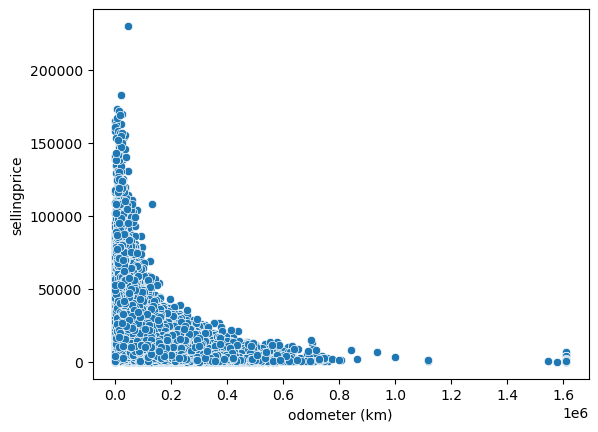

In [105]:
sns.scatterplot(car_sales, x='odometer (km)', y='sellingprice')

In [106]:
car_sales['sellingprice'].describe()

count    558825.000000
mean      13611.358810
std        9749.501628
min           1.000000
25%        6900.000000
50%       12100.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64

#### How does the vehicle's condition affect its price?

<Axes: xlabel='condition', ylabel='sellingprice'>

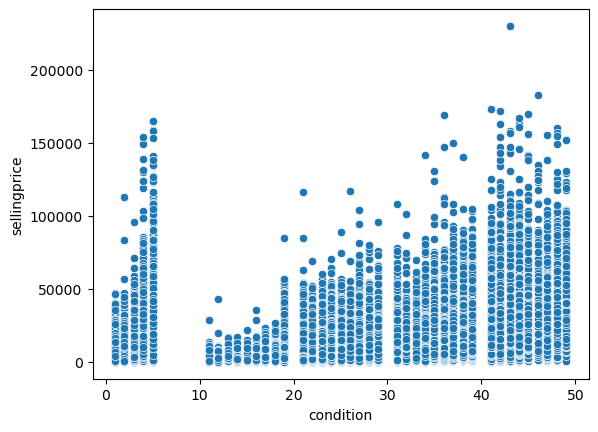

In [116]:
sns.scatterplot(car_sales, x='condition', y='sellingprice')

In [121]:
car_sales['condition'].describe()

count    547017.000000
mean         30.672365
std          13.402832
min           1.000000
25%          23.000000
50%          35.000000
75%          42.000000
max          49.000000
Name: condition, dtype: float64

<Axes: xlabel='condition', ylabel='Count'>

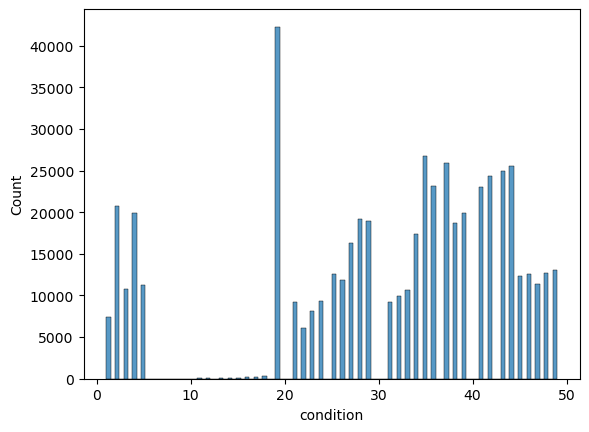

In [129]:
sns.histplot(car_sales['condition'])

In [141]:
car_sales[car_sales['condition']>20]['saledate'].count() #se venden más por encima de cierta condición
print((car_sales[car_sales['condition']>20]['saledate'].count())/(car_sales['saledate'].count())*100,'%')

77.54538540688051 %


#### How does the vehicle's manufacturing year affect its price?

In [253]:
# Sales by manufacturing year 
car_sales.groupby('year')['sellingprice'].count()  #As anticipated the newer models show higher sales volume

year
1982         2
1983         1
1984         5
1985        10
1986        11
1987         8
1988        11
1989        20
1990        49
1991        67
1992       132
1993       205
1994       392
1995       711
1996       851
1997      1546
1998      2149
1999      3363
2000      5227
2001      6468
2002      9715
2003     13281
2004     17342
2005     21394
2006     26913
2007     30845
2008     31502
2009     20594
2010     26485
2011     48548
2012    102313
2013     98160
2014     81068
2015      9437
Name: sellingprice, dtype: int64

In [276]:
car_sales.groupby('year')['sellingprice'].mean() # As expected the newer models maintain higher market values

year
1982    12750.000000
1983     5250.000000
1984     2160.000000
1985     3520.000000
1986     2538.636364
1987     1512.500000
1988     3168.181818
1989     1620.000000
1990     1435.714286
1991      943.656716
1992      991.666667
1993      833.902439
1994      870.599490
1995      913.292546
1996      985.781434
1997     1157.454722
1998     1261.719404
1999     1533.696105
2000     1827.834130
2001     2131.014224
2002     2611.709315
2003     3447.268654
2004     4321.474455
2005     4893.989857
2006     6190.204808
2007     8021.969687
2008     9508.054092
2009    10462.313295
2010    12412.453313
2011    15851.677185
2012    16653.749836
2013    17476.602700
2014    20090.200535
2015    25932.117198
Name: sellingprice, dtype: float64

[Text(0, 0.5, 'avg. selling price ($)'), Text(0.5, 0, 'manufacture year')]

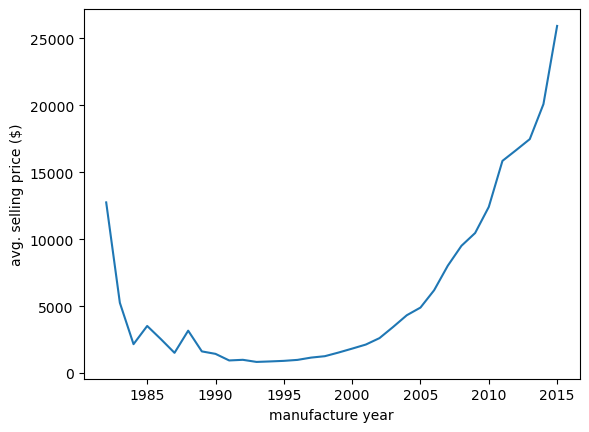

In [283]:
g = car_sales.groupby('year')['sellingprice'].mean().plot()
g.set(ylabel='avg. selling price ($)', xlabel='manufacture year')   # se puede mejorar agrupando los primeros años

<Axes: xlabel='year', ylabel='sellingprice'>

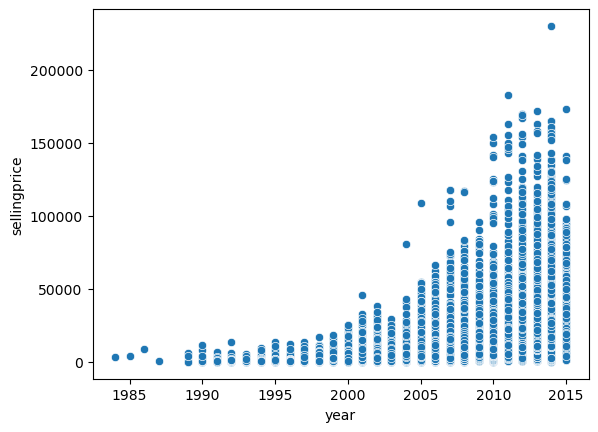

In [631]:
sns.scatterplot(car_sales, x='year', y='sellingprice')

#### Brand/model effect on selling price

In [360]:
car_sales.groupby('make')['sellingprice'].mean().sort_values(ascending=False).head(10)  

make
Rolls-Royce     153488.235294
Ferrari         127210.526316
Lamborghini     112625.000000
Bentley          74367.672414
Airstream        71000.000000
Tesla            67054.347826
Aston Martin     54812.000000
Fisker           46461.111111
Maserati         44947.058824
Lotus            40800.000000
Name: sellingprice, dtype: float64

In [363]:
car_sales.groupby(['make', 'model'])['sellingprice'].mean().sort_values(ascending=False).head(10)  # Luxury brands hold the higher prices, as expected

make           model                
Ferrari        458 Italia               183000.000000
Mercedes-Benz  Sls Amg Gt               156500.000000
Bmw            I8                       154222.222222
Bentley        Flying Spur              154000.000000
Rolls-Royce    Ghost                    153488.235294
Ferrari        California               131846.153846
Mercedes-Benz  Sls Amg                  116016.666667
Lamborghini    Gallardo                 112625.000000
Bentley        Continental Gtc Speed    111000.000000
Ferrari        F430                     109750.000000
Name: sellingprice, dtype: float64

#### What is the average selling price by state?

In [366]:
car_sales.groupby('state')['sellingprice'].mean().sort_values(ascending=False).head(10) 
#This actually is deceptive untill we take a look upon profit margins

state
ON    17812.623475
TN    17009.744341
PA    15976.303133
CO    15877.798714
NV    15097.772014
MI    14886.217974
IL    14792.146946
CA    14505.902786
MO    14466.192344
OH    14406.619235
Name: sellingprice, dtype: float64

### Profitability

#### How does pricing affect sales volume?

[Text(0, 0.5, 'Number of sales')]

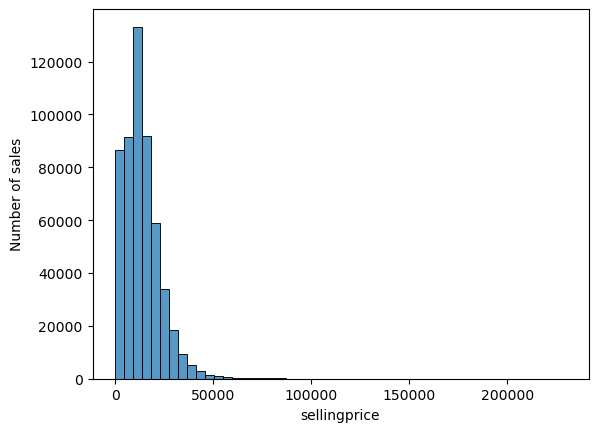

In [669]:
g=sns.histplot(car_sales['sellingprice'], bins=50)
g.set(ylabel='Number of sales')

In [176]:
sales_by_price = car_sales.groupby('sellingprice').size().reset_index(name='sales_volume')
sales_by_price['price_range'] = pd.cut(sales_by_price['sellingprice'], bins=[0,5000,10000,15000,20000,30000,40000,60000,80000,100000,150000,200000,300000])
sales_by_price_range = sales_by_price.groupby('price_range')['sales_volume'].sum().reset_index(name='# of sales')

C:\Users\kniel\AppData\Local\Temp\ipykernel_27320\548603262.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_price_range = sales_by_price.groupby('price_range')['sales_volume'].sum().reset_index(name='# of sales')


In [177]:
sales_by_price_range

,price_range,# of sales
0,"(0, 5000]",104982
1,"(5000, 10000]",111305
2,"(10000, 15000]",142897
3,"(15000, 20000]",88390
4,"(20000, 30000]",81390
5,"(30000, 40000]",20670
6,"(40000, 60000]",7577
7,"(60000, 80000]",1140
8,"(80000, 100000]",308
9,"(100000, 150000]",141


In [180]:
 corr = sales_by_price['sellingprice'].corr(sales_by_price['sales_volume'])

In [181]:
corr

-0.2853499388881373

#### Price vs MMR rate

We'll consider 3 sales group in order to its price vs MMR rate:

Underestimated price: sales which rate is below 90% ------ Could mean profit losses

Fair price: sales which rate is between 90% and 110% 

Overrated price: sales which rate is above 110% ------ Undermining price confidence and could mean driving costumers away


In [62]:
# To avoid sensitivity to sales volume: lets use sales >1000
sales_count = car_sales['make'].value_counts()
top_car_sales = sales_count[sales_count >1000].index
top_car_salesdf = car_sales[car_sales['make'].isin(top_car_sales)]    # To drop brands with few sales (beneath 1000 sales)

###### By brand and model

In [713]:
top_car_salesdf.groupby('make')['price vs MMR rate (%)'].mean().sort_values(ascending=False).head(10)

make
Suzuki        102.213785
Acura         100.670827
Lincoln       100.478002
Lexus         100.465707
Gmc           100.404283
Honda         100.296492
Mitsubishi    100.259002
Mazda         100.188797
Land Rover    100.042482
Volvo          99.945555
Name: price vs MMR rate (%), dtype: float64

In [714]:
top_car_salesdf.groupby(['make','model'])['price vs MMR rate (%)'].mean().sort_values(ascending=False).head(10)

make           model         
Chevrolet      Silverado 3500    309.203030
Suzuki         Esteem            241.077441
Chrysler       Lhs               229.429746
Mercedes-Benz  400-Class         218.604651
Ford           F-150 Heritage    203.005048
Chevrolet      1500              168.357543
Gmc            Yukon Denali      164.757610
Ford           F350              164.266667
Volvo          S90               156.649242
Ford           Excurs            154.761905
Name: price vs MMR rate (%), dtype: float64

In [715]:
top_car_salesdf.groupby('make')['price vs MMR rate (%)'].mean().loc[['Ford','Chevrolet', 'Nissan', 'Toyota', 'Dodge']]
# Is a small difference but still, the average selling price for top brands is below MMR

make
Ford         99.293341
Chevrolet    99.062173
Nissan       99.211334
Toyota       99.553448
Dodge        98.075184
Name: price vs MMR rate (%), dtype: float64

###### By state

In [716]:
top_car_salesdf.groupby('state')['price vs MMR rate (%)'].mean().sort_values(ascending=False).head(30) 
#FL, TX and PA top states in sales, are below the rate

state
NM    113.246078
AB    107.658101
NC    106.708370
WA    104.640689
GA    103.397107
NE    103.162406
ON    102.112192
CA    101.767591
SC    101.134908
CO    100.953750
OR    100.838506
TN    100.776609
MN    100.686736
MO    100.683123
NV     99.521567
FL     99.198125
PA     98.800275
AL     98.662560
AZ     98.218625
MI     98.190192
QC     97.963360
IL     97.886818
OH     97.850065
LA     97.821408
TX     97.569219
VA     97.327529
WI     95.964190
NJ     95.204572
MS     94.992907
IN     94.603921
Name: price vs MMR rate (%), dtype: float64

In [9]:
def price_classification(series_value):
    if series_value<90:
        return 'Underpriced'
    elif series_value>90 and series_value<110:
        return 'Fair'
    else:
        return 'Overpriced'

Text(0, 0.5, '')

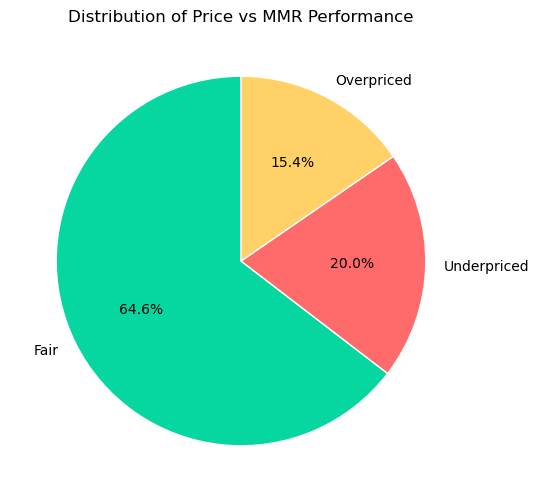

In [41]:
# To synthetize the idea
plt.figure(figsize=(8, 6))
car_sales['price vs MMR rate (%)'].apply(price_classification).value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['#06d6a0','#ff6b6b','#ffd166'],
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title('Distribution of Price vs MMR Performance')
plt.ylabel('')

More than 30% of the vehicles sold out of the boundaries proposed, deriving in possible profit losses or driving customers away. 

This underscores the need for a predictive pricing tool to improve performance in vehicle valuations.

## Price prediction using machine learning regression algorithm

We'll consider two Machine Learning algortithms: the classic Linear Regression and Random Forest Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#### Getting the rows that need to be dropped

In [11]:
no_make = car_sales[car_sales['make']=='Nan'].index # 12k registers aprox 2% of the dataset
no_model = car_sales[car_sales['model']=='Nan'].index # 12k registers aprox 2% of the dataset
no_state = car_sales[car_sales['state'].isna()].index # a few registers

In [12]:
no_condition = car_sales[car_sales['condition'].isna()].index # 12k reg aprox 2% of the dataset
no_odometer = car_sales[car_sales['odometer (km)'].isna()].index # a few registers
no_mmr = car_sales[car_sales['mmr'].isna()].index # a few registers
no_selling_price = car_sales[car_sales['sellingprice'].isna()].index #a few registers

In [13]:
idx_to_drop = no_make.append([no_model, no_state, no_condition, no_odometer, no_mmr, no_selling_price])

In [14]:
car_sales.drop(index=idx_to_drop, inplace=True) #overall aprox 5% of the dataset needed to be dropped

#### Lets split the data

In [15]:
#Since regression algorithms tend to work only with numerical data, categorical fields must be encoded or out of consideration

In [16]:
from category_encoders import TargetEncoder 

In [17]:
encoder = TargetEncoder(cols=['make', 'model', 'state'])
car_sales_encoded = encoder.fit_transform(car_sales, car_sales['sellingprice'])

In [18]:
X = car_sales_encoded[['year','make', 'model', 'state', 'condition','mmr', 'odometer (km)']]
y = car_sales_encoded['sellingprice']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Trainning the model, predictions and evaluation

##### Classical Linear Regression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
predictions = lm.predict(X_test)

In [96]:
coeff_df = pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
year,-46.108023
make,-0.007948
model,0.011887
state,0.040543
condition,37.203924
mmr,0.977928
odometer (km),-0.000747


<Axes: xlabel='sellingprice'>

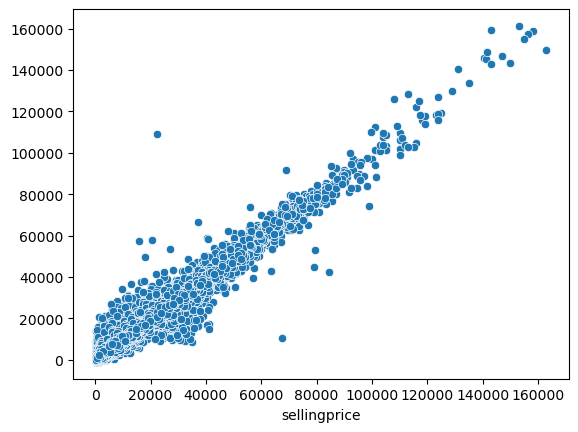

In [619]:
sns.scatterplot(x=y_test, y=predictions)

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R^2:",metrics.explained_variance_score(y_test, predictions))

MAE: 1049.2872679430238
MSE: 2708383.1252270974
RMSE: 1645.7165993047215
R^2: 0.9712244412791522


##### Random Forest 

In [25]:
# Trainning
model = RandomForestRegressor(n_estimators=100, random_state=101)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

In [26]:
#Prediction
pred = model.predict(X_test)

In [627]:
# Features importance to model predictions
df_coef = pd.DataFrame(data=model.feature_importances_, index=X.columns, columns=['Coefficient'])
df_coef

,Coefficient
year,0.002235
make,0.002309
model,0.004048
state,0.003284
condition,0.009361
mmr,0.969936
odometer (km),0.008827


<Axes: xlabel='sellingprice'>

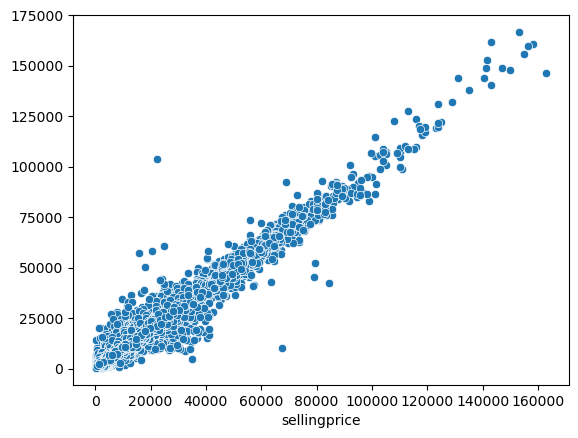

In [628]:
sns.scatterplot(x=y_test, y=pred)

In [33]:
#Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("R^2:",metrics.explained_variance_score(y_test, pred))

MAE: 950.1242193526748
MSE: 2294507.9148081327
RMSE: 1514.763319732866
R^2: 0.9756213689840015


#### Comparison

### MMR as price predictor vs Classical Regression Model predictions

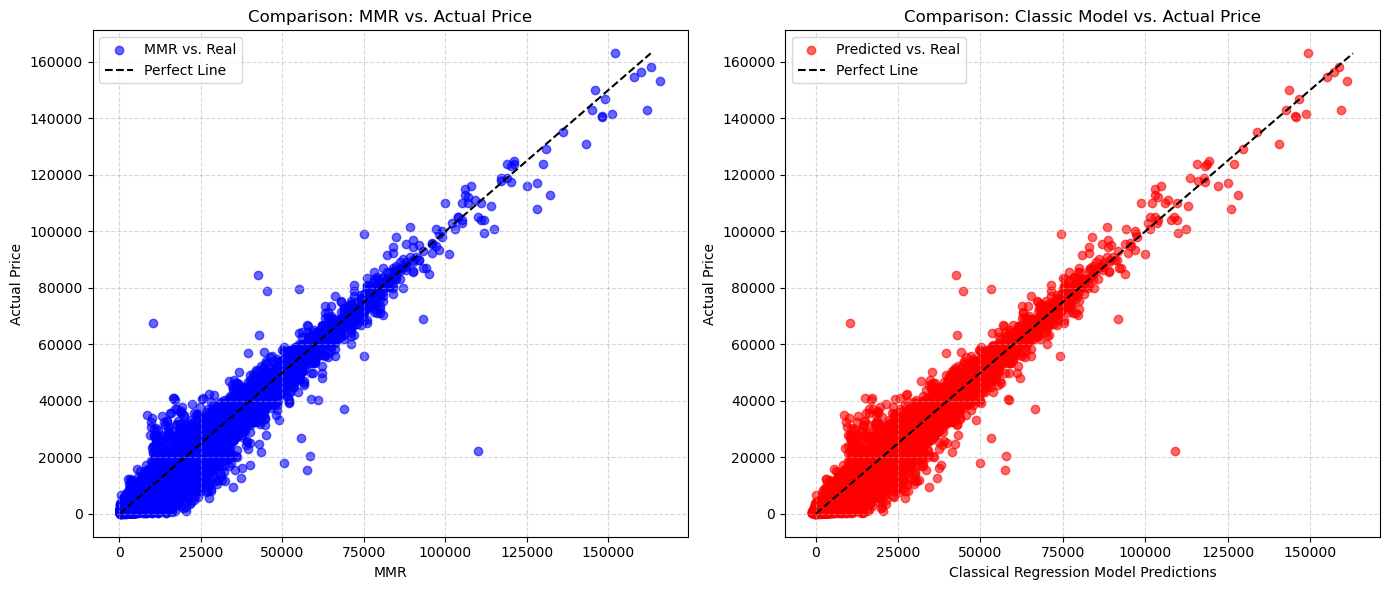

In [70]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# MMR vs. actual price
ax1.scatter(X_test['mmr'], y_test, color='blue', alpha=0.6, label='MMR vs. Real')
ax1.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label='Perfect Line')
ax1.set_xlabel('MMR')
ax1.set_ylabel('Actual Price')
ax1.set_title('Comparison: MMR vs. Actual Price')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.5)

# Classical Regression Model vs. Actual Price
ax2.scatter(predictions, y_test, color='red', alpha=0.6, label='Predicted vs. Real')
ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label='Perfect Line')
ax2.set_xlabel('Classical Regression Model Predictions')
ax2.set_ylabel('Actual Price')
ax2.set_title('Comparison: Classic Model vs. Actual Price')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.5)


plt.tight_layout()
plt.show()

In [26]:
from tabulate import tabulate

rmse_mmr = np.sqrt(metrics.mean_squared_error(y_test, X_test['mmr']))
rmse_model = np.sqrt(metrics.mean_squared_error(y_test, predictions))
improvement = (rmse_mmr - rmse_model) / rmse_mmr * 100

metriks = [
    ["Metric", "MMR Benchmark", "Classic Model", "Improvement"],
    ["RMSE (USD)", f"${rmse_mmr:,.2f}", f"${rmse_model:,.2f}", f"{improvement:.1f}%"],
    ["R² Score", f"{metrics.explained_variance_score(y_test, X_test['mmr']):.3f}", f"{metrics.explained_variance_score(y_test, predictions):.3f}", "-"]
]

print(tabulate(metriks, headers="firstrow", tablefmt="pretty", stralign="center"))

+------------+---------------+---------------+-------------+
|   Metric   | MMR Benchmark | Classic Model | Improvement |
+------------+---------------+---------------+-------------+
| RMSE (USD) |   $1,722.72   |   $1,645.72   |    4.5%     |
|  R² Score  |     0.969     |     0.971     |      -      |
+------------+---------------+---------------+-------------+


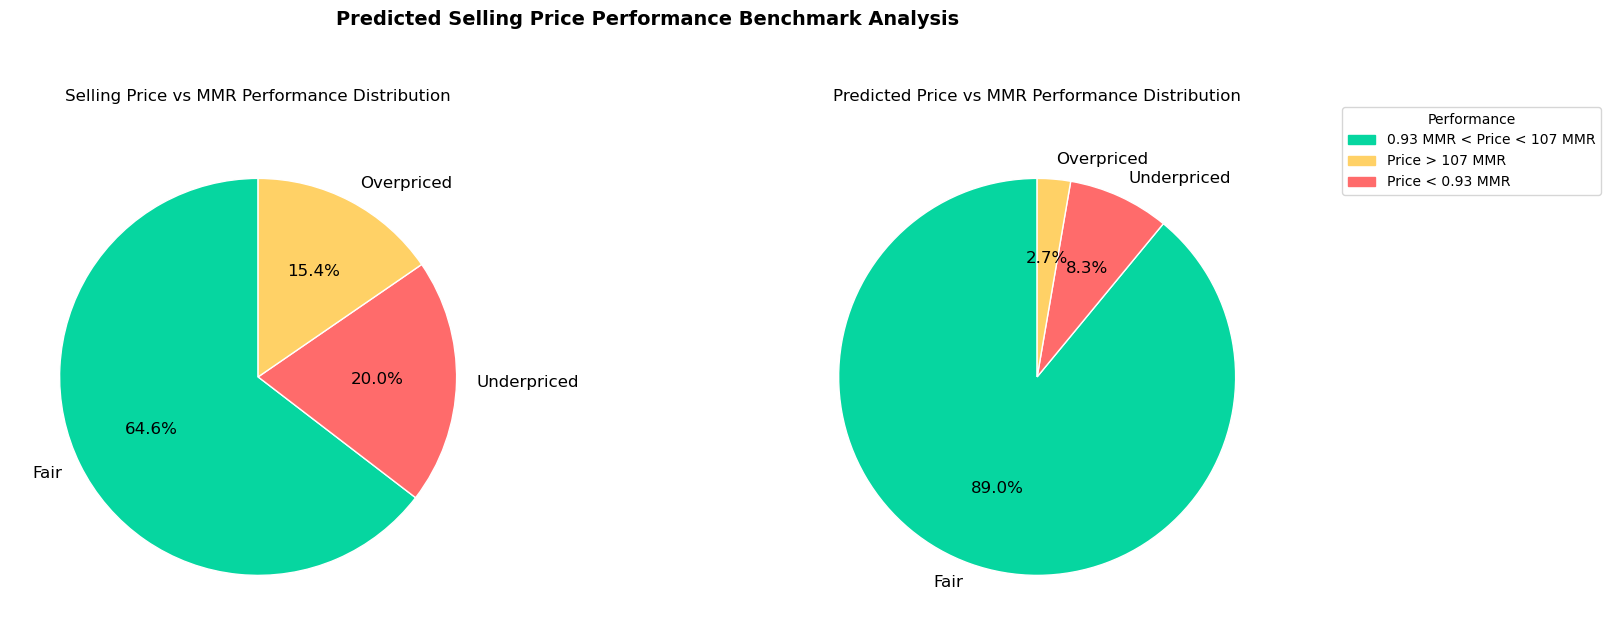

In [24]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# actual sellling price vs. MMR rate

car_sales['price vs MMR rate (%)'].apply(price_classification)\
    .value_counts()\
    .plot.pie(
        autopct='%1.1f%%',
        colors=['#06d6a0','#ff6b6b','#ffd166'],  # Green-Red-Yellow
        startangle=90,
        ax=ax1,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 12}
    )
ax1.set_title('Selling Price vs MMR Performance Distribution', pad=20)
ax1.set_ylabel('')

# Classical Regression model predictions vs. MMR rate
((predictions/X_test['mmr'])*100).apply(price_classification)\
    .value_counts()\
    .plot.pie(
        autopct='%1.1f%%',
        colors=['#06d6a0','#ff6b6b','#ffd166'],
        startangle=90,
        ax=ax2,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 12}
    )
ax2.set_title('Predicted Price vs MMR Performance Distribution', pad=20)
ax2.set_ylabel('')

plt.suptitle('Predicted Selling Price Performance Benchmark Analysis', y=1.05, fontsize=14, fontweight='bold')
plt.tight_layout()

# Legend
handles = [
    plt.Rectangle((0,0),1,1, color='#06d6a0', label='0.93 MMR < Price < 107 MMR'),
    plt.Rectangle((0,0),1,1, color='#ffd166', label='Price > 107 MMR'),
    plt.Rectangle((0,0),1,1, color='#ff6b6b', label='Price < 0.93 MMR')
]
fig.legend(
    handles=handles,
    title='Performance',
    loc='upper right',
    bbox_to_anchor=(1.1, 0.9),
    frameon=True
)

plt.show()

### MMR as price predictor vs Random Forest Regression Model predictions

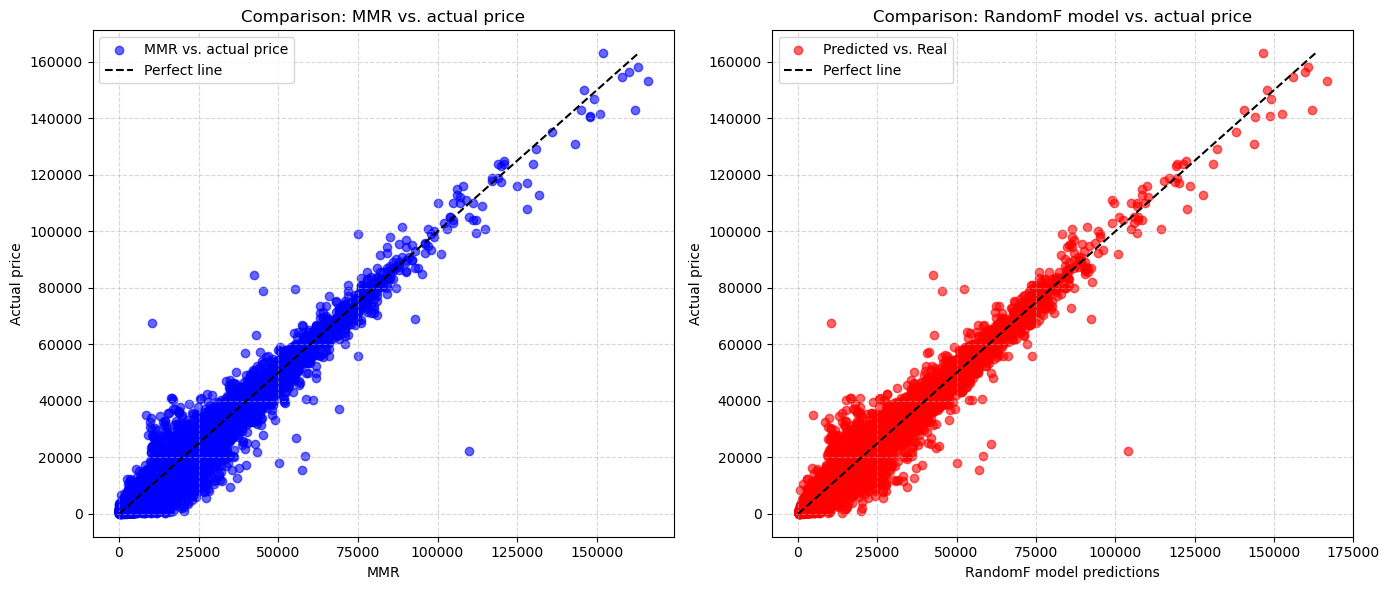

In [69]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# MMR vs. actual price
ax1.scatter(X_test['mmr'], y_test, color='blue', alpha=0.6, label='MMR vs. actual price')
ax1.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label='Perfect line')
ax1.set_xlabel('MMR')
ax1.set_ylabel('Actual price')
ax1.set_title('Comparison: MMR vs. actual price')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.5)

# RF Model predictions vs. actual price
ax2.scatter(pred, y_test, color='red', alpha=0.6, label='Predicted vs. Real')
ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label='Perfect line')
ax2.set_xlabel('RandomF model predictions')
ax2.set_ylabel('Actual price')
ax2.set_title('Comparison: RandomF model vs. actual price')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [30]:

rmse_mmr = np.sqrt(metrics.mean_squared_error(y_test, X_test['mmr']))
rmse_rfmodel = np.sqrt(metrics.mean_squared_error(y_test, pred))
improvement = (rmse_mmr - rmse_rfmodel) / rmse_mmr * 100

metriks = [
    ["Metric", "MMR Benchmark", "Random Forest", "Improvement"],
    ["RMSE (USD)", f"${rmse_mmr:,.2f}", f"${rmse_rfmodel:,.2f}", f"{improvement:.1f}%"],
    ["R² Score", f"{metrics.explained_variance_score(y_test, X_test['mmr']):.3f}", f"{metrics.explained_variance_score(y_test, pred):.3f}", "-"]
]

print(tabulate(metriks, headers="firstrow", tablefmt="pretty", stralign="center"))

+------------+---------------+---------------+-------------+
|   Metric   | MMR Benchmark | Random Forest | Improvement |
+------------+---------------+---------------+-------------+
| RMSE (USD) |   $1,722.72   |   $1,514.76   |    12.1%    |
|  R² Score  |     0.969     |     0.976     |      -      |
+------------+---------------+---------------+-------------+


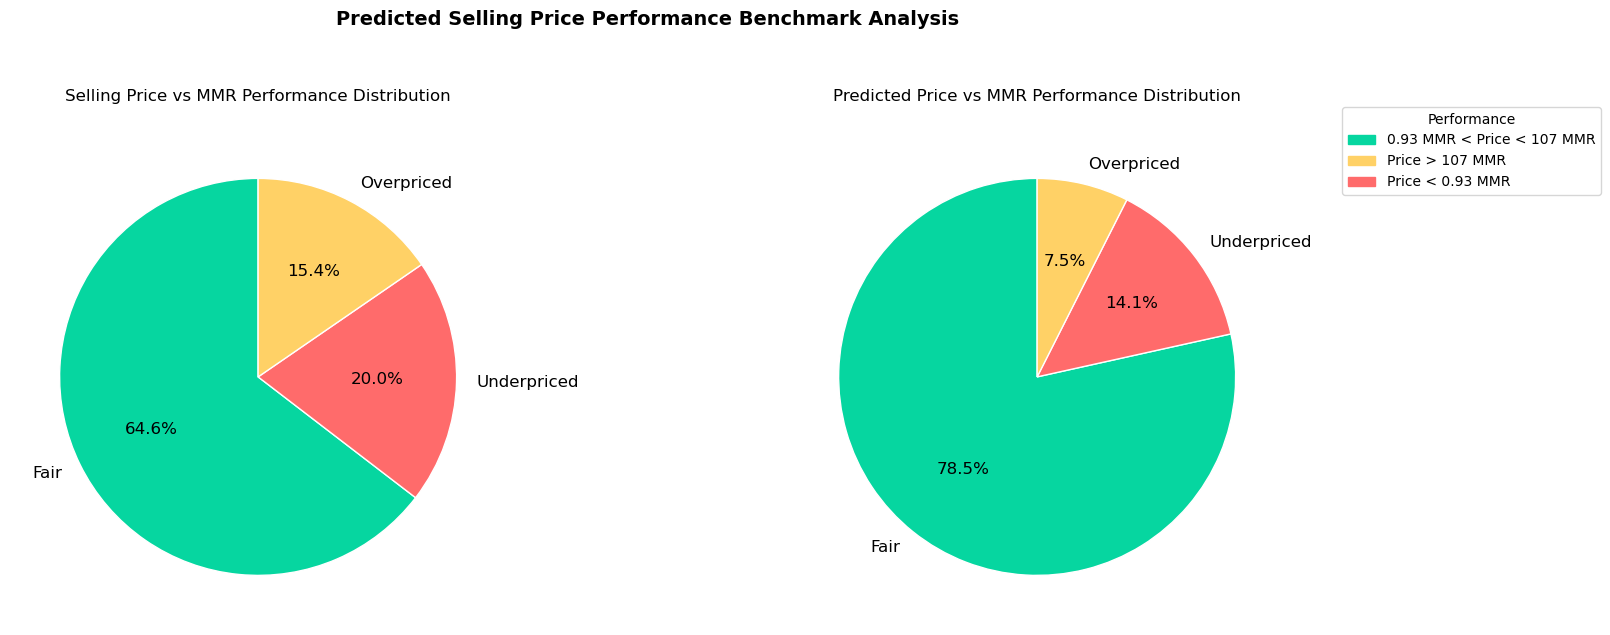

In [27]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# actual sellling price vs. MMR rate
car_sales['price vs MMR rate (%)'].apply(price_classification)\
    .value_counts()\
    .plot.pie(
        autopct='%1.1f%%',
        colors=['#06d6a0','#ff6b6b','#ffd166'],  # Green-Red-Yellow
        startangle=90,
        ax=ax1,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 12}
    )
ax1.set_title('Selling Price vs MMR Performance Distribution', pad=20)
ax1.set_ylabel('')

# RF model predictions vs. MMR rate
((pred/X_test['mmr'])*100).apply(price_classification)\
    .value_counts()\
    .plot.pie(
        autopct='%1.1f%%',
        colors=['#06d6a0','#ff6b6b','#ffd166'],
        startangle=90,
        ax=ax2,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 12}
    )
ax2.set_title('Predicted Price vs MMR Performance Distribution', pad=20)
ax2.set_ylabel('')

plt.suptitle('Predicted Selling Price Performance Benchmark Analysis', y=1.05, fontsize=14, fontweight='bold')
plt.tight_layout()

# Legend
handles = [
    plt.Rectangle((0,0),1,1, color='#06d6a0', label='0.93 MMR < Price < 107 MMR'),
    plt.Rectangle((0,0),1,1, color='#ffd166', label='Price > 107 MMR'),
    plt.Rectangle((0,0),1,1, color='#ff6b6b', label='Price < 0.93 MMR')
]
fig.legend(
    handles=handles,
    title='Performance',
    loc='upper right',
    bbox_to_anchor=(1.1, 0.9),
    frameon=True
)

plt.show()

##### Insights:


Both models exhibit a strong reliance on MMR feature, which is expected given its role as an established price estimator. Indeed, MMR proves  esential for optimizing model performance and minimizin error metrics across the board.

However, model selection must allign with our bussiness objetive. While the Random Forest model achieves superior predictive accuracy (lower error values) the Classical Regression better serves to our porpose of reducing over and under priced sales.

The Linear Regression approach delivers three key operational advantages:

1-Reduces overpriced listings by 82% (2.7% vs 15.4% on the original data), minimizing client alienation.

2-Cuts underpriced transactions more than half (8.3% vs 20% on the original data), protecting profit margins

3-Maintains pricing flexibility through consistent feature coefficients, avoiding RF's over-reliance on MMR.

This occurs because the linear model preserves independent weightings for all predictive features, while Random Forest's decision trees disproportionately favor MMR splits to minimize error, effectively "overfitting" to market biases we're trying to correct.




## Features influence on the selling price and model predictions  

In [110]:
X = car_sales_encoded[['year','make', 'model', 'state', 'condition', 'odometer (km)']]
y = car_sales_encoded['sellingprice']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Classical linear regression

In [112]:
lm = LinearRegression()

In [113]:
lm.fit(X_train, y_train)

LinearRegression()

In [114]:
coeff_df = pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
year,667.031373
make,0.162916
model,0.791788
state,0.158684
condition,174.207153
odometer (km),-0.028723


##### Interpreting the coefficients:

#### Numerical Features

- Manufacturing Year: Each newer model year increases the vehicle's value by $667, showing how age affects depreciation.

- Condition: Improving the condition rating by 1 point raises the price by $174.2.

- Odometer: For every 1,000 km driven, the value drops by $28.72. For  example, a vehicle with 50,000 km would be worth 1,415 less than the same model with 45,000 km.

#### Categorical Features (Target Encoded)

- Brand (make): When a brand's average historical price increases by $1, the predicted price only rises by 0.16. This small effect happens because brand values combine different models, like Toyota's range from Corollas to Land Cruisers.

- Model: A $1 increase in a model's historical price leads to a 0.79 increase in predicted price. This strong impact reflects specific features like trim levels or engine options.

- State: Location has a limited influence on price. For example, if California's average prices are $2,000 higher than Texas, the model only adds 300 dollars to a California vehicle's value.


### Random Forest Regression

In [610]:
model = RandomForestRegressor(n_estimators=100, random_state=101)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

In [611]:
pred = model.predict(X_test)

In [612]:
df_coef = pd.DataFrame(data=model.feature_importances_, index=X.columns, columns=['Coefficient'])
df_coef

,Coefficient
year,0.091384
make,0.044163
model,0.461511
state,0.015185
condition,0.025734
odometer (km),0.362024


#### Interpreting coefficient importance of the Random Forest Model

The Random Forest Regression model identifies model (0.46) and odometer (0.36) as the dominant factors in predicting vehicle prices, collectively explaining over 80% of the predictive power. The strong influence of model highlights the critical role of trim levels, engine specifications, and model-specific features in determining value, while odometer confirms the expected impact of mileage on depreciation. Secondary factors like year (0.09) and condition (0.03) contribute modestly, whereas make (0.04) and state (0.02) play negligible roles, suggesting that geographic location and broad brand categories are less discriminatory than specific model attributes. 

These results emphasize that accurate pricing depends primarily on detailed model information and precise mileage data, with other features providing marginal refinements. For inventory valuation or pricing tools, prioritizing these key variables will yield the highest prediction accuracy.

##### Key notes:

- Random Forest importance is non-linear and reflects predictive power, not directional relationships.
- Values sum to ~1 (normalized), allowing direct comparison.

## Exporting for price calculator in EXCEL and POWER BI dashboard

In [22]:
def convert_condition(x):       #This way condition is more trackable
    if x<7:
        return 1
    elif x>7 and x<14:
        return 2
    elif x>14 and x<21:
        return 3
    elif x>21 and x<28:
        return 4
    elif x>28 and x<35:
        return 5
    elif x>35 and x<42:
        return 6
    else:
        return 7

In [23]:
def km_grouping(x): 
    if x < 5000:
        return 'Less than 5000 km'
    elif x>5000 and x<10000:
        return 'Between 5000 and 10000 km'
    elif x>10000 and x<30000:
        return 'Between 10000 and 30000 km'
    elif x>30000 and x<60000:
        return 'Between 30000 and 60000 km'
    elif x>60000 and x<80000:
        return 'Between 60000 and 80000 km'
    else:
        return 'More than 80000 km'
    

In [24]:
car_sales['condition'] = car_sales['condition'].apply(convert_condition)

In [25]:
car_sales['residual_adjusted'] = (car_sales['sellingprice'] - (car_sales['mmr']*0.9779))  #necessary for price calc

In [26]:
car_sales['odometer group (km)'] = car_sales['odometer (km)'].apply(km_grouping)

##### Tables to export

In [27]:
condition_table = car_sales.groupby('condition')[['residual_adjusted','mmr']].mean()
condition_table['residual_adjusted'][1] = -4200.2
condition_table['residual %'] = condition_table['residual_adjusted']/condition_table['mmr']

C:\Users\kniel\AppData\Local\Temp\ipykernel_12852\130096075.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  condition_table['residual_adjusted'][1] = -4200.2


In [148]:
year_table = car_sales.groupby('year')[['residual_adjusted','mmr']].mean()
year_table['residual_adjusted'][1987] =-8.88 
year_table['residual_adjusted'][1986] =-250.43                 #manually changing some outliers
year_table['residual_adjusted'][1985] =-190.72
year_table['residual %'] = year_table['residual_adjusted']/year_table['mmr']

C:\Users\kniel\AppData\Local\Temp\ipykernel_7624\2610403815.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  year_table['residual_adjusted'][1987] =-8.88
C:\Users\kniel\AppData\Local\Temp\ipykernel_7624\2610403815.py:3: FutureWarning: Cha

In [103]:
state_table = car_sales.groupby('state')[['residual_adjusted','mmr']].mean()
state_table['residual %'] = state_table['residual_adjusted']/state_table['mmr']

In [104]:
odometer_table = car_sales.groupby('odometer group (km)')[['residual_adjusted','mmr']].mean()
odometer_table['residual %'] = odometer_table['residual_adjusted']/odometer_table['mmr']

In [28]:
make_model_table = car_sales.groupby(['make','model','year','odometer group (km)'])[['residual_adjusted','mmr',]].mean()

In [163]:
odometer_make_table = car_sales.groupby(['make','odometer group (km)'])[['residual_adjusted','mmr']].mean()
odometer_make_table['residual %'] = odometer_make_table['residual_adjusted']/odometer_make_table['mmr']

In [29]:
margins_n_units = car_sales.groupby(['make','model','year'])[['sellingprice','price vs MMR rate (%)']].mean()
margins_n_units['Units sold']=car_sales.groupby(['make','model','year'])['vin'].count()

In [43]:
data_pricemmr_rate_performance=car_sales['price vs MMR rate (%)'].apply(price_classification)\
    .value_counts()
model_pricemmr_rate_performance=((predictions/X_test['mmr'])*100).apply(price_classification)\
    .value_counts()

In [166]:
make_model_table.to_csv('make_model_table.csv')
odometer_table.to_csv('odometer_table.csv')
odometer_make_table.to_csv('odometer_make_table.csv')
state_table.to_csv('state_table.csv')
year_table.to_csv('year_table.csv')
condition_table.to_csv('condition_table.csv')

In [54]:
margins_n_units.to_csv('margins_n_units.csv')

In [44]:
data_pricemmr_rate_performance.to_csv('data_pricemmr_performance.csv')
model_pricemmr_rate_performance.to_csv('model_pricemmr_performance.csv')

##### To predict new entries selling price:

In [24]:
pruebas= [
    [2014,12353,11284,14706,42, 17583, 4500],
    [2010,14633, 19032, 14115,31, 27310, 30000],
    [2000,11074,8822, 14252,25, 2012, 50000]
]

In [25]:
lm.predict(pruebas)

C:\Users\kniel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17685.01887525, 27003.49954319,  2399.26595086])

 mean de ratios sensible a volumen, el otro no, mean de ratios me va a dar un mejor panorama de a que porcentaje suele venderse por encima o por debajo, la otra metrica es un global del dinero movido por ese modelo